# Project: Wrangling and Analyze Data

In [1]:
# Downloading and importing all the necessary libraries to complete the project.
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
import os
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
from PIL import Image

In [3]:
pd.set_option('display.max_colwidth', -1)

In [4]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [5]:
#Get the first data provided 

df_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [7]:
df_arc.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
#Download Image Predictions Programmatically Using The Requests Library

url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [9]:
df_img = pd.read_csv('image-predictions.tsv',sep='\t')


In [10]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df_img.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_arc.tweet_id.values
len(tweet_ids)


2356

In [13]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [14]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [15]:
tweet_json = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 
                                                       'favorite_count'])

In [16]:
tweet_json.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [17]:
df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [18]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
df_arc.tweet_id.duplicated().sum()

0

In [20]:
df_arc['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [21]:
df_arc['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [22]:
df_arc['name'].value_counts().head(50)

None        745
a           55 
Charlie     12 
Cooper      11 
Lucy        11 
Oliver      11 
Penny       10 
Tucker      10 
Lola        10 
Winston     9  
Bo          9  
the         8  
Sadie       8  
Bailey      7  
Toby        7  
Daisy       7  
an          7  
Buddy       7  
Oscar       6  
Rusty       6  
Bella       6  
Dave        6  
Jack        6  
Koda        6  
Stanley     6  
Scout       6  
Leo         6  
Milo        6  
Jax         6  
Louis       5  
Gus         5  
Oakley      5  
Alfie       5  
George      5  
Larry       5  
very        5  
Sunny       5  
Phil        5  
Chester     5  
Bentley     5  
Sammy       5  
Finn        5  
Riley       4  
Duke        4  
Carl        4  
Maddie      4  
Chip        4  
Clarence    4  
Brody       4  
Clark       4  
Name: name, dtype: int64

> "doggo", "floofer", "pupper", "puppo" are categories that should not be columns

> high volume on null entries for the following columns, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"

> The entries of the column "source" are urls.

> The denominator should be the value of 10, but there are other values appearing as the denominator. This is erroneous. 

> While the numerator can take any value, there are clearly values that are erroneous.

> The "timestamp" column is a string. 

> Many instances where the entries in the column, "name" is labeled "None". This indicates missing values.

> Under the column, "name", there are other random entries like "a", "an", & "the". This indicates these entries have been erroneously labeled.  


In [23]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_img.tweet_id.duplicated().sum()

0

In [26]:
df_img.jpg_url.duplicated().sum()

66

In [27]:
df_img['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
bib                   1  
cougar                1  
zebra                 1  
syringe               1  
groenendael           1  
Name: p1, Length: 378, dtype: int64

> "tweet_id" is in integer. 

> There are instances where the image prediction are not Dogs.

> Dog breeds have both upper & lower cases

> "jpg_url" has duplicates

In [28]:
tweet_json.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


> Change "id_str" to "tweet_id"

### Quality issues
1. high volume on null entries for the following columns, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"


2. The "timestamp" column is a string.


3. The denominator should be the value of 10, but there are other values appearing as the denominator. This is erroneous.



4. While the numerator can take any value, there are clearly values that are erroneous.


5. Inconsistency in naming convention. Dog breeds have both upper & lower cases. 


6. "jpg_url" has duplicates


7. "tweet_id" is in integer.


8. There are instances where the image prediction are not Dogs.

### Tidiness issues

1. "doggo", "floofer", "pupper", "puppo" are categories that should not be columns


2. Change "id_str" to "tweet_id"

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
df_arc_copy = df_arc.copy()
df_img_copy = df_img.copy()
tweet_json_copy = tweet_json.copy()

### Issue #1: Retain Original Tweets

#### Define:  

To retain original tweets, retweets and replies have to go. 

#### Code

In [30]:
#Assign the retweets and replies to variables
df_rt = df_arc_copy[pd.notnull(df_arc_copy['retweeted_status_id'])]
df_rpl = df_arc_copy[pd.notnull(df_arc_copy['in_reply_to_status_id'])]

In [31]:
df_rt

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https:/…,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveT

In [32]:
df_rpl

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [33]:
# Drop the retweet and reply variables.

df_arc_copy.drop(index=df_rt.index, inplace=True)
df_arc_copy.drop(index=df_rpl.index, inplace=True)

#### Test

In [34]:
df_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: Drop unnecessary columns 


#### Define

> The following columns, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", & "retweeted_status_timestamp" are now unnecessary. Drop them. 

> Also drop columns, "source" and "expanded_urls"

#### Code

In [35]:
df_arc_copy = df_arc_copy.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

#### Test

In [36]:
df_arc_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


### Issue #3: The denominator should be the value of 10, but there are other values appearing as the denominator.

#### Define

Correct the instances where the denominator has values other than 10. 

#### Code

In [37]:
df_denum = df_arc_copy[df_arc_copy['rating_denominator'] != 10]  #Pick out denominators with values other than 10
df_denum.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this,None,None,None,None


In [38]:
df_denum[['tweet_id','text','rating_numerator','rating_denominator']]  # Extract a sub dataframe for better visibility

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


> From the texts in dataframe above, there are denominators that were wrongly misrepresented. 

> The following ids have the denominator that's 10, '740373189193256964', '722974582966214656', '716439118184652801', '682962037429899265', & '666287406224695296'

In [39]:
#Change the denominators of the tweet_ids that have been misrepresented.

df_arc_copy.loc[df_arc_copy.tweet_id == 740373189193256964, ['rating_denominator']] = 10
df_arc_copy.loc[df_arc_copy.tweet_id == 722974582966214656, ['rating_denominator']] = 10
df_arc_copy.loc[df_arc_copy.tweet_id == 716439118184652801, ['rating_denominator']] = 10
df_arc_copy.loc[df_arc_copy.tweet_id == 682962037429899265, ['rating_denominator']] = 10
df_arc_copy.loc[df_arc_copy.tweet_id == 666287406224695296, ['rating_denominator']] = 10

#### Test

In [40]:
df_arc_copy.loc[df_arc_copy.tweet_id == 722974582966214656]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,10,None,None,None,None,None


In [41]:
df_arc_copy.loc[df_arc_copy.tweet_id == 740373189193256964]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,10,None,None,None,None,None


### Issue #4: Erroneous values in the numerator.

#### Define

Correct the numerators for the denominators that were corrected above.

#### Code

In [42]:
df_arc_copy.loc[df_arc_copy.tweet_id == 740373189193256964, ['rating_numerator']] = 14
df_arc_copy.loc[df_arc_copy.tweet_id == 722974582966214656, ['rating_numerator']] = 13
df_arc_copy.loc[df_arc_copy.tweet_id == 716439118184652801, ['rating_numerator']] = 11
df_arc_copy.loc[df_arc_copy.tweet_id == 682962037429899265, ['rating_numerator']] = 10
df_arc_copy.loc[df_arc_copy.tweet_id == 666287406224695296, ['rating_numerator']] = 9

#### Test

In [43]:
df_arc_copy.loc[df_arc_copy.tweet_id == 722974582966214656]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10,None,None,None,None,None


In [44]:
df_arc_copy.loc[df_arc_copy.tweet_id == 740373189193256964]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10,None,None,None,None,None


### Issue #5: Inconsistency in naming convention. Dog breeds have both upper & lower cases.

#### Define

To make the naming convention consistent, capitalise the names of the Dog breeds like a proper noun.

#### Code

In [45]:
df_arc_copy['name'] = df_arc_copy.name.str.capitalize()

#### Test

In [46]:
df_arc_copy['name'].head()

0    Phineas 
1    Tilly   
2    Archie  
3    Darla   
4    Franklin
Name: name, dtype: object

### Issue #6: "jpg_url" has duplicates

#### Define

To drop duplicate values from jpg_url

#### Code

In [47]:
df_img_copy = df_img_copy.drop_duplicates(subset=['jpg_url'], keep='first')

#### Test

In [48]:
sum(df_img_copy['jpg_url'].duplicated())

0

### Issue #7: "tweet_id" is in integer.

#### Define

Change "tweet_id" from Integer to String. Also change the datatypes in other situations necessary. 

#### Code

In [49]:
df_arc_copy['timestamp'] = pd.to_datetime(df_arc_copy['timestamp'])
df_arc_copy['tweet_id'] = df_arc_copy['tweet_id'].astype('str')
df_img_copy['tweet_id'] = df_img_copy['tweet_id'].astype('str')

#### Test

In [50]:
df_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   doggo               2097 non-null   object             
 7   floofer             2097 non-null   object             
 8   pupper              2097 non-null   object             
 9   puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 180.2+ KB


In [51]:
df_img_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [52]:
df_arc_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


In [53]:
df_img_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #8: There are instances where the image prediction are not Dogs.

#### Define

To eliminate rows where the image predictions are not Dogs. 

#### Code

In [54]:
# keep rows with at least one dog prediction
df_img_copy = df_img_copy.query('(p1_dog != False) or (p2_dog != False) or (p3_dog != False)')

#### Test

In [55]:
df_img_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1691 non-null   object 
 1   jpg_url   1691 non-null   object 
 2   img_num   1691 non-null   int64  
 3   p1        1691 non-null   object 
 4   p1_conf   1691 non-null   float64
 5   p1_dog    1691 non-null   bool   
 6   p2        1691 non-null   object 
 7   p2_conf   1691 non-null   float64
 8   p2_dog    1691 non-null   bool   
 9   p3        1691 non-null   object 
 10  p3_conf   1691 non-null   float64
 11  p3_dog    1691 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 137.1+ KB


### Issue #9: "doggo", "floofer", "pupper", "puppo" are categories that should not be columns


#### Define

Eliminate the columns "doggo", "floofer", "puppo", & "pupper" and change to categories under a column

#### Code

In [56]:
#Use a for loop to replace all the 'None'
specie = ['doggo','pupper', 'floofer', 'puppo' ]
for i in specie:
        df_arc_copy[i] = df_arc_copy[i].replace('None', '')
        
#Combine
df_arc_copy['specie'] = df_arc_copy.doggo.str.cat(df_arc_copy.floofer).str.cat(df_arc_copy.pupper).str.cat(df_arc_copy.puppo)



In [57]:
#Drop the columns
df_arc_copy = df_arc_copy.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#Use np.nan to fill the empty
df_arc_copy['specie'] = df_arc_copy['specie'].replace('', np.nan)

#### Test

In [58]:
df_arc_copy[df_arc_copy['specie'] == 'puppo'].head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,specie
12,889665388333682689,2017-07-25 01:55:32+00:00,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,13,10,None,puppo
14,889531135344209921,2017-07-24 17:02:04+00:00,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,13,10,Stuart,puppo
71,878776093423087618,2017-06-25 00:45:22+00:00,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,13,10,Snoopy,puppo
94,874012996292530176,2017-06-11 21:18:31+00:00,"This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V",13,10,Sebastian,puppo
129,867421006826221569,2017-05-24 16:44:18+00:00,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,12,10,Shikha,puppo


### Issue #10: Change "id_str" to "tweet_id"

#### Define

Change "id_str" to "tweet_id"

#### Code

In [59]:
tweet_json_copy.rename({'id_str': 'tweet_id'}, axis=1, inplace=True)

#### Test

In [60]:
tweet_json_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [61]:
tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
tweet_json_copy.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [63]:
df_img_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [64]:
df_arc_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,specie
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN


In [65]:
#Merge df_arc_copy & tweet_json_copy

df_tweet_merge = df_arc_copy.join(tweet_json_copy.set_index('tweet_id'), on='tweet_id')

In [66]:
df_tweet_merge.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,specie,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,9774,41048


In [67]:
df_tweet_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   specie              336 non-null    object             
 7   retweet_count       2097 non-null   int64              
 8   favorite_count      2097 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 163.8+ KB


In [68]:
#Merge df_img_copy & df_tweet_merge

df_tweet_merger = df_tweet_merge.join(df_img_copy.set_index('tweet_id'), on='tweet_id')

In [69]:
df_tweet_merger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   specie              336 non-null    object             
 7   retweet_count       2097 non-null   int64              
 8   favorite_count      2097 non-null   int64              
 9   jpg_url             1666 non-null   object             
 10  img_num             1666 non-null   float64            
 11  p1                  1666 non-null   object             
 12  p1_conf             1666 non-null 

In [70]:
#Let's keep rows that have picture 

df_tweet_merger = df_tweet_merger[df_tweet_merger['jpg_url'].notnull()]

In [71]:
df_tweet_merger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   object             
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   text                1666 non-null   object             
 3   rating_numerator    1666 non-null   int64              
 4   rating_denominator  1666 non-null   int64              
 5   name                1666 non-null   object             
 6   specie              257 non-null    object             
 7   retweet_count       1666 non-null   int64              
 8   favorite_count      1666 non-null   int64              
 9   jpg_url             1666 non-null   object             
 10  img_num             1666 non-null   float64            
 11  p1                  1666 non-null   object             
 12  p1_conf             1666 non-null 

In [72]:
#Store the clean DataFrame in a CSV file

df_tweet_merger.to_csv('twitter_data.csv',index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [73]:
df_tweet_merger.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,specie,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [74]:
df_tweet_merger_copy = df_tweet_merger.copy()

In [75]:
#Change some column names
df_tweet_merger_copy.rename({'p1': 'prediction_one'}, axis=1, inplace=True)
df_tweet_merger_copy.rename({'p2': 'prediction_two'}, axis=1, inplace=True)
df_tweet_merger_copy.rename({'p3': 'prediction_three'}, axis=1, inplace=True)
df_tweet_merger_copy.rename({'p1_dog': 'dog_one'}, axis=1, inplace=True)
df_tweet_merger_copy.rename({'p2_dog': 'dog_two'}, axis=1, inplace=True)
df_tweet_merger_copy.rename({'p3_dog': 'dog_three'}, axis=1, inplace=True)
df_tweet_merger_copy.rename({'p1_conf': 'confidence_one'}, axis=1, inplace=True)
df_tweet_merger_copy.rename({'p2_conf': 'confidence_two'}, axis=1, inplace=True)
df_tweet_merger_copy.rename({'p3_conf': 'confidence_three'}, axis=1, inplace=True)

In [76]:
df_tweet_merger_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,specie,retweet_count,favorite_count,jpg_url,img_num,prediction_one,confidence_one,dog_one,prediction_two,confidence_two,dog_two,prediction_three,confidence_three,dog_three
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [77]:
df_tweet_merger_copy.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,confidence_one,confidence_two,confidence_three
count,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1.666000e+03
mean,11.379952,10.442377,2834.429772,9288.184274,1.214286,0.605894,0.137377,6.126978e-02
std,7.422168,6.261708,4831.960790,12641.538890,0.573959,0.266392,0.101624,5.192826e-02
min,0.000000,7.000000,16.000000,81.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,10.000000,10.000000,650.500000,2176.000000,1.000000,0.379132,0.054788,1.593940e-02
50%,11.000000,10.000000,1440.500000,4464.000000,1.000000,0.607074,0.121376,4.985555e-02
75%,12.000000,10.000000,3261.000000,11734.750000,1.000000,0.853256,0.199369,9.465743e-02
max,165.000000,150.000000,79515.000000,132810.000000,4.000000,0.999984,0.467678,2.734190e-01


In [78]:
df_tweet_merger_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1666 non-null   object             
 1   timestamp           1666 non-null   datetime64[ns, UTC]
 2   text                1666 non-null   object             
 3   rating_numerator    1666 non-null   int64              
 4   rating_denominator  1666 non-null   int64              
 5   name                1666 non-null   object             
 6   specie              257 non-null    object             
 7   retweet_count       1666 non-null   int64              
 8   favorite_count      1666 non-null   int64              
 9   jpg_url             1666 non-null   object             
 10  img_num             1666 non-null   float64            
 11  prediction_one      1666 non-null   object             
 12  confidence_one      1666 non-null 

In [79]:
df_tweet_merger_copy['rating_numerator'].value_counts()

12     421
10     359
11     353
13     222
9      132
8      68 
7      31 
14     22 
6      16 
5      14 
4      6  
3      5  
2      2  
144    1  
165    1  
24     1  
26     1  
27     1  
44     1  
45     1  
60     1  
75     1  
80     1  
84     1  
88     1  
99     1  
121    1  
0      1  
Name: rating_numerator, dtype: int64

In [80]:
df_tweet_merger_copy['prediction_one'].value_counts()

golden_retriever      137
Labrador_retriever    94 
Pembroke              88 
Chihuahua             78 
pug                   54 
                      .. 
mortarboard           1  
earthstar             1  
hare                  1  
Loafer                1  
polecat               1  
Name: prediction_one, Length: 214, dtype: int64

In [81]:
Top_ten_dog_one = df_tweet_merger_copy['prediction_one'].value_counts().head(10)
Top_ten_dog_one


golden_retriever      137
Labrador_retriever    94 
Pembroke              88 
Chihuahua             78 
pug                   54 
chow                  41 
Samoyed               40 
Pomeranian            38 
toy_poodle            37 
malamute              29 
Name: prediction_one, dtype: int64

In [82]:
Top_ten_one = Top_ten_dog_one.rename_axis('Dog_Name').reset_index(name='Counts')
Top_ten_one

,Dog_Name,Counts
0,golden_retriever,137
1,Labrador_retriever,94
2,Pembroke,88
3,Chihuahua,78
4,pug,54
5,chow,41
6,Samoyed,40
7,Pomeranian,38
8,toy_poodle,37
9,malamute,29


In [83]:
df_tweet_merger_copy['prediction_two'].value_counts()

Labrador_retriever          95
golden_retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
                            ..
beaver                      1 
hare                        1 
cougar                      1 
shoji                       1 
sleeping_bag                1 
Name: prediction_two, Length: 227, dtype: int64

In [84]:
Top_ten_dog_two = df_tweet_merger_copy['prediction_two'].value_counts().head(10)
Top_ten_dog_two


Labrador_retriever          95
golden_retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
French_bulldog              39
Pomeranian                  38
toy_poodle                  36
Siberian_husky              33
miniature_poodle            32
Name: prediction_two, dtype: int64

In [85]:
Top_ten_two = Top_ten_dog_two.rename_axis('Dog_Name').reset_index(name='Counts')
Top_ten_two

,Dog_Name,Counts
0,Labrador_retriever,95
1,golden_retriever,82
2,Cardigan,72
3,Chihuahua,43
4,Chesapeake_Bay_retriever,40
5,French_bulldog,39
6,Pomeranian,38
7,toy_poodle,36
8,Siberian_husky,33
9,miniature_poodle,32


In [86]:
df_tweet_merger_copy['prediction_three'].value_counts()

Labrador_retriever    76
Chihuahua             57
golden_retriever      45
Eskimo_dog            36
kelpie                33
                      ..
mitten                1 
purse                 1 
bucket                1 
refrigerator          1 
can_opener            1 
Name: prediction_three, Length: 231, dtype: int64

In [87]:
Top_ten_dog_three = df_tweet_merger_copy['prediction_three'].value_counts().head(10)
Top_ten_dog_three


Labrador_retriever           76
Chihuahua                    57
golden_retriever             45
Eskimo_dog                   36
kelpie                       33
kuvasz                       31
Staffordshire_bullterrier    30
chow                         30
beagle                       29
cocker_spaniel               29
Name: prediction_three, dtype: int64

In [88]:
Top_ten_three = Top_ten_dog_two.rename_axis('Dog_Name').reset_index(name='Counts')
Top_ten_three

,Dog_Name,Counts
0,Labrador_retriever,95
1,golden_retriever,82
2,Cardigan,72
3,Chihuahua,43
4,Chesapeake_Bay_retriever,40
5,French_bulldog,39
6,Pomeranian,38
7,toy_poodle,36
8,Siberian_husky,33
9,miniature_poodle,32


In [89]:
df_fav_retweet = df_tweet_merger_copy[['retweet_count', 'favorite_count']]
df_fav_retweet.head()

,retweet_count,favorite_count
1,6514,33819
2,4328,25461
3,8964,42908
4,9774,41048
5,3261,20562


In [90]:
#Correlation matrix between the retweet count & favorite count
df_fav_retweet.corr()


,retweet_count,favorite_count
retweet_count,1.000000,0.913284
favorite_count,0.913284,1.000000


In [91]:
#Further check of the correlation between the retweet count & favorite count
corr_fav_retweet = df_tweet_merger_copy['retweet_count'].corr(df_tweet_merger_copy['favorite_count'])
corr_fav_retweet

0.9132839144048363

### Insights:
> 1. The top five (5) most common rating are within the scale of 9/10 to 13/10

> 2. After the first prediction, the top ten (10) most predicted dogs are: <ul><li>golden_retriever</li><li>Labrador_retriever</li><li>Pembroke</li><li>Chihuahua</li><li>pug</li><li>chow</li><li>Samoyed</li><li>Pomeranian</li><li>toy_poodle</li><li>malamute</li></ul>

> 3. After the second prediction, the top ten (10) most predicted dogs are: <ul><li>Labrador_retriever</li><li>golden_retriever</li><li>Cardigan</li><li>Chihuahua</li><li>Chesapeake_Bay_retriever</li><li>French_bulldog</li><li>Pomeranian</li><li>toy_poodle</li><li>Siberian_husky</li><li>cocker_spaniel</li></ul>

> 4. After the third prediction, the top ten (10) most predicted dogs are: <ul><li>Labrador_retriever</li><li>Chihuahua</li><li>golden_retriever</li><li>Eskimo_dog</li><li>kelpie</li><li>kuvasz</li><li>chow</li><li>Pomeranian</li><li>cocker_spaniel</li><li>toy_poodle</li></ul>

> 5. There's a correlation between the retweet count & favorite count. The correlation value is 0.913284. This is strong positive correlation that indicates a linear relationship between retweet count & favorite count

### Visualization

<AxesSubplot:>

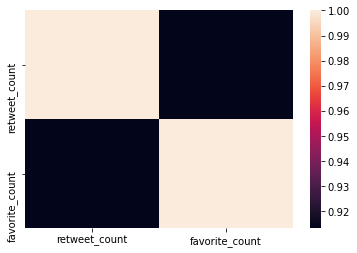

In [92]:
#Create heatmap to express the correlation between retweet count & favorite count

sns.heatmap(df_fav_retweet.corr())

Text(0.5, 1.0, 'Top Ten Dogs After Prediction One')

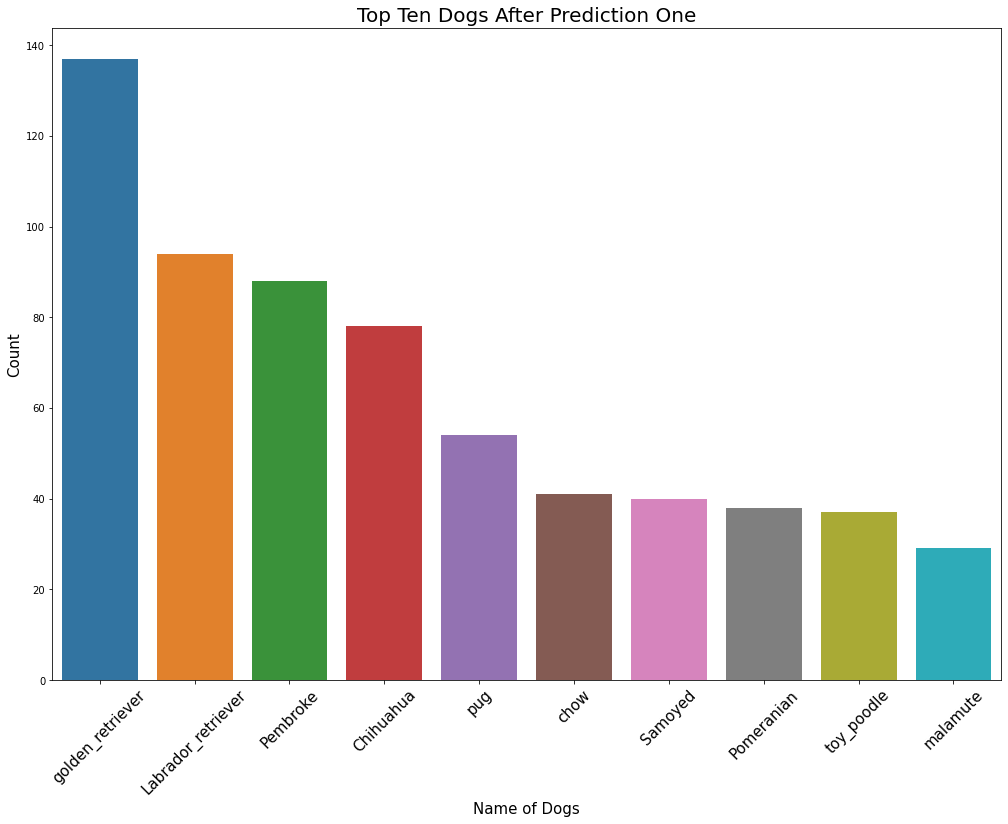

In [93]:
# Creating a Bar Chart to show the Top Ten Dogs After Prediction One

fig = plt.figure(figsize = (17, 12))

ax = sns.barplot(x = 'Dog_Name', y = 'Counts', data = Top_ten_one)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, fontsize = 15)
plt.xlabel("Name of Dogs",fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Top Ten Dogs After Prediction One",fontsize = 20)

> The chart clearly expresses the top 10 dogs after prediction one. Using different colors, the chart also distinguishes the dogs apart. 

Text(0.5, 1.0, 'Top Ten Dogs After Prediction Two')

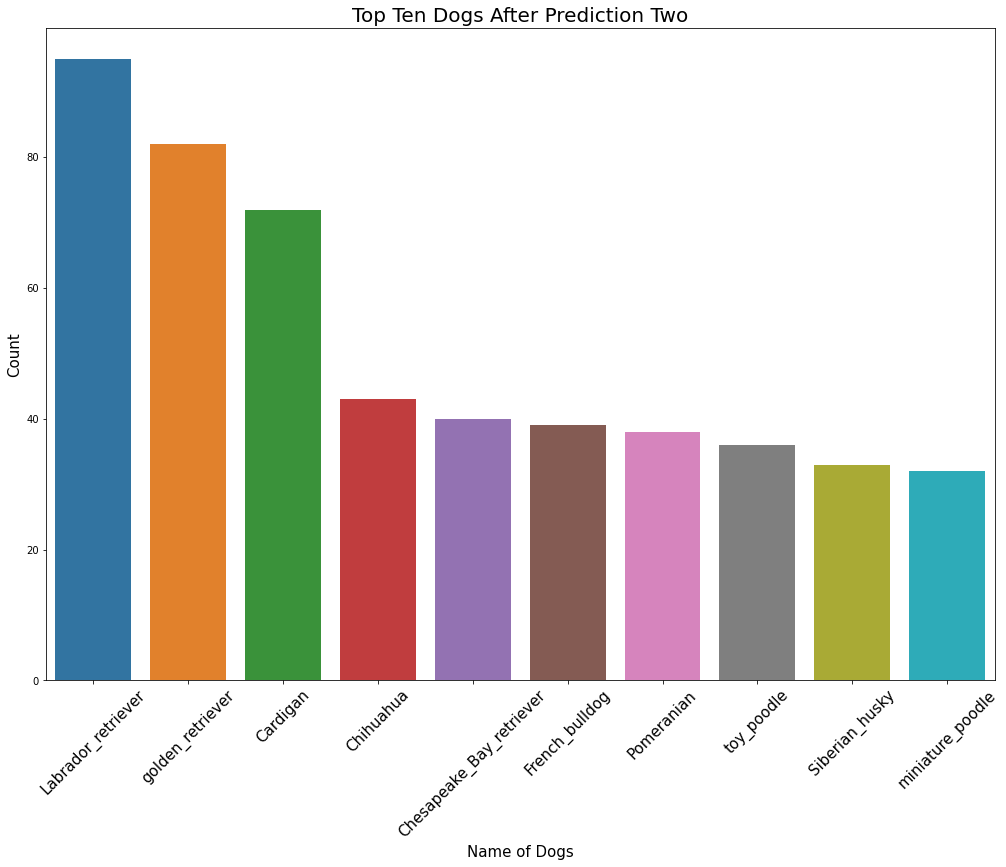

In [94]:
# Creating a Bar Chart to show the Top Ten Dogs After Prediction Two

fig = plt.figure(figsize = (17, 12))

ax = sns.barplot(x = 'Dog_Name', y = 'Counts', data = Top_ten_two)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, fontsize = 15)
plt.xlabel("Name of Dogs",fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Top Ten Dogs After Prediction Two",fontsize = 20)

> The chart clearly expresses the top 10 dogs after prediction two. Using different colors, the chart also distinguishes the dogs apart. 

Text(0.5, 1.0, 'Top Ten Dogs After Prediction Three')

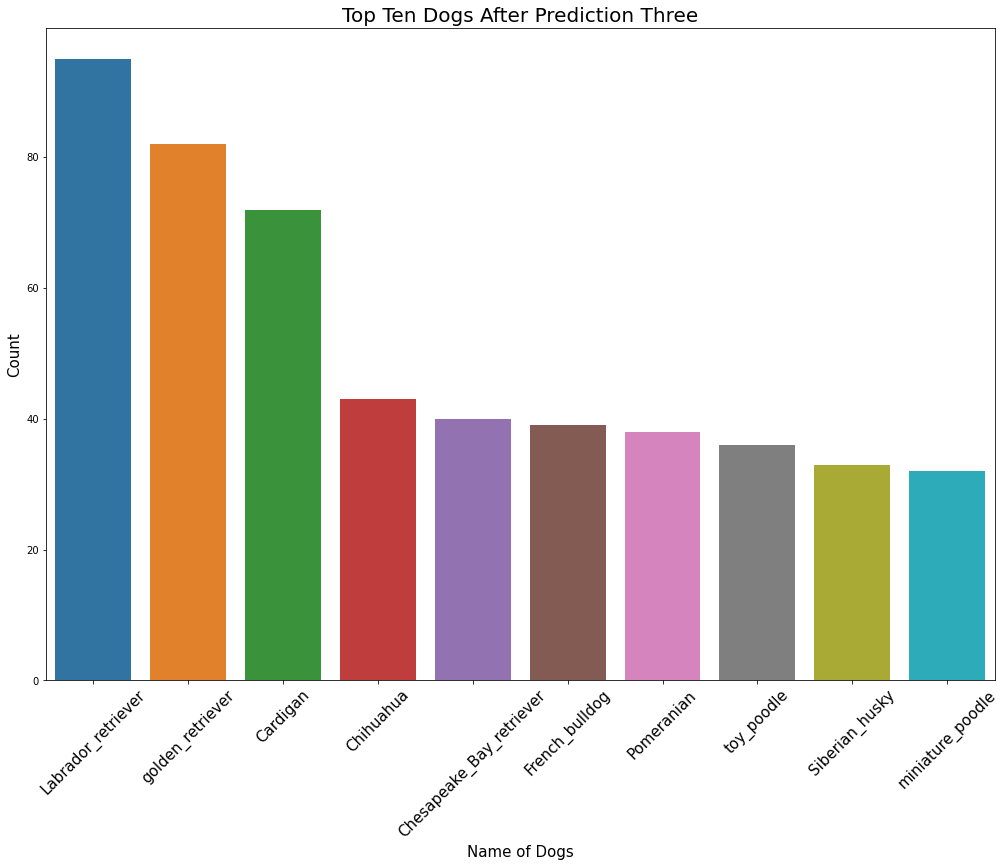

In [95]:
# Creating a Bar Chart to show the Top Ten Dogs After Prediction Three

fig = plt.figure(figsize = (17, 12))

ax = sns.barplot(x = 'Dog_Name', y = 'Counts', data = Top_ten_three)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, fontsize = 15)
plt.xlabel("Name of Dogs",fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Top Ten Dogs After Prediction Three",fontsize = 20)

> The chart clearly expresses the top 10 dogs after prediction three. Using different colors, the chart also distinguishes the dogs apart. 